In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [17]:
imported_data = []
uniqueAuction = []
auctionTable = []
uniqueTime = []
uniqueTimeDay = []

with open("data.txt", "r") as data_file:
    for row in data_file:
        tempRow = row.strip()
        tempRow = tempRow.split(",")
        imported_data.append(list(tempRow))

# Adding a weekend flag since most feasts are used in raids and people raid on weekends
        
weekendList = ['Friday','Saturday','Sunday']

for row in range(0, len(imported_data)):
    imported_data[row][4] = int(imported_data[row][4])
    imported_data[row][5] = int(imported_data[row][5])
    imported_data[row][7] = datetime.combine(datetime.strptime(imported_data[row][6], '%x').date(),datetime.strptime(imported_data[row][7], '%X').time())
    if imported_data[row][8] in weekendList:
        imported_data[row][9] = 1
    else:
        imported_data[row][9] = 0
    del imported_data[row][6]
    del imported_data[row][3]
    del imported_data[row][1]

for row in range(0, len(imported_data)):
    if imported_data[row][0] not in uniqueAuction:
        uniqueAuction.append(imported_data[row][0])
    else:
        ''

for row in range(0, len(uniqueAuction)):
    auctionTable.append([uniqueAuction[row],'',0, 0, datetime(1900, 1, 1, 0, 0, 0), '', 0])

for row in range(0, len(auctionTable)):
    for subrow in range(0, len(imported_data)):
        if (auctionTable[row][0] == imported_data[subrow][0]) and (auctionTable[row][4] < imported_data[subrow][4]):
            auctionTable[row][1] = imported_data[subrow][1]
            auctionTable[row][2] = imported_data[subrow][2]
            auctionTable[row][3] = imported_data[subrow][3]
            auctionTable[row][4] = imported_data[subrow][4]
            auctionTable[row][5] = imported_data[subrow][5]
            auctionTable[row][6] = imported_data[subrow][6]
        else:
            ''

itemID = [172043,172053,172055,173034,173036,173037]

itemName = ['Feast of Gluttonous Hedonism','Tenebrous Ribs','Phantasmal Haunch','Silvergill Pike','Spinefin Piranha','Elysian Thade']

for row in range(0, len(imported_data)):
    if imported_data[row][4] not in uniqueTime:
        uniqueTime.append(imported_data[row][4])
        uniqueTimeDay.append(imported_data[row][5])
    else:
        ''

#headers = [['auctionID','itemName','units','pricePerUnit','auctionDatetime','dayOfWeek','weekendFlag']]
#auctionTable = headers + auctionTable

In [18]:
len(imported_data)

132798

In [19]:
len(auctionTable)

13104

In [20]:
feastCost = []
ribsCost = []
haunchCost = []
pikeCost = []
piranhaCost = []
thadeCost = []

itemCount = 0
itemTotal = 0

for timestamp in range(0, len(uniqueTime)):
    for item in range(0, len(itemName)):
        tempPrice = 0
        for row in range(0, len(auctionTable)):
            if (auctionTable[row][1] == itemName[item]) and (auctionTable[row][4] == uniqueTime[timestamp]):
                itemCount = itemCount + auctionTable[row][2]
                itemTotal = itemTotal + (auctionTable[row][3] * auctionTable[row][2])
        if itemCount == 0.0:
            itemCount = 1
        tempPrice = round((itemTotal/itemCount),0) /10000
        if tempPrice == 0.0:
            tempPrice = None
        if itemName[item] == 'Feast of Gluttonous Hedonism':
            feastCost.append(tempPrice)
        if itemName[item] == 'Tenebrous Ribs':
            ribsCost.append(tempPrice)
        if itemName[item] == 'Phantasmal Haunch':
            haunchCost.append(tempPrice)
        if itemName[item] == 'Silvergill Pike':
            pikeCost.append(tempPrice)
        if itemName[item] == 'Spinefin Piranha':
            piranhaCost.append(tempPrice)
        if itemName[item] == 'Elysian Thade':
            thadeCost.append(tempPrice)
        itemCount = 0
        itemTotal = 0
        

In [21]:
feastMinMax = []
ribsMinMax = []
haunchMinMax = []
pikeMinMax = []
piranhaMinMax = []
thadeMinMax = []

itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(feastCost)):
    if feastCost[row] is not None and feastCost[row] > itemMax:
        itemMax = feastCost[row]
    if feastCost[row] is not None and feastCost[row] < itemMin:
        itemMin = feastCost[row]
feastMinMax.append([itemMin, itemMax])

itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(ribsCost)):
    if ribsCost[row] is not None and ribsCost[row] > itemMax:
        itemMax = ribsCost[row]
    if ribsCost[row] is not None and ribsCost[row] < itemMin:
        itemMin = ribsCost[row]
ribsMinMax.append([itemMin, itemMax])
itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(haunchCost)):
    if haunchCost[row] is not None and haunchCost[row] > itemMax:
        itemMax = haunchCost[row]
    if haunchCost[row] is not None and haunchCost[row] < itemMin:
        itemMin = haunchCost[row]
haunchMinMax.append([itemMin, itemMax])
itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(pikeCost)):
    if pikeCost[row] is not None and pikeCost[row] > itemMax:
        itemMax = pikeCost[row]
    if pikeCost[row] is not None and pikeCost[row] < itemMin:
        itemMin = pikeCost[row]
pikeMinMax.append([itemMin, itemMax])
itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(piranhaCost)):
    if piranhaCost[row] is not None and piranhaCost[row] > itemMax:
        itemMax = piranhaCost[row]
    if piranhaCost[row] is not None and piranhaCost[row] < itemMin:
        itemMin = piranhaCost[row]
piranhaMinMax.append([itemMin, itemMax])
itemMin = 999999999
itemMax = 0

###############################################################

for row in range(0, len(thadeCost)):
    if thadeCost[row] is not None and thadeCost[row] > itemMax:
        itemMax = thadeCost[row]
    if thadeCost[row] is not None and thadeCost[row] < itemMin:
        itemMin = thadeCost[row]
thadeMinMax.append([itemMin, itemMax])

In [22]:
print('Lowest feast price was ' + str(feastMinMax[0][0]) + ' and occurred on ' + str(uniqueTime[feastCost.index(feastMinMax[0][0])]))

Lowest feast price was 1900.95 and occurred on 2021-01-30 01:00:04


In [23]:
print('Highest feast price was ' + str(feastMinMax[0][1]) + ' and occurred on ' + str(uniqueTime[feastCost.index(feastMinMax[0][1])]))

Highest feast price was 49000.0 and occurred on 2021-01-31 07:00:17


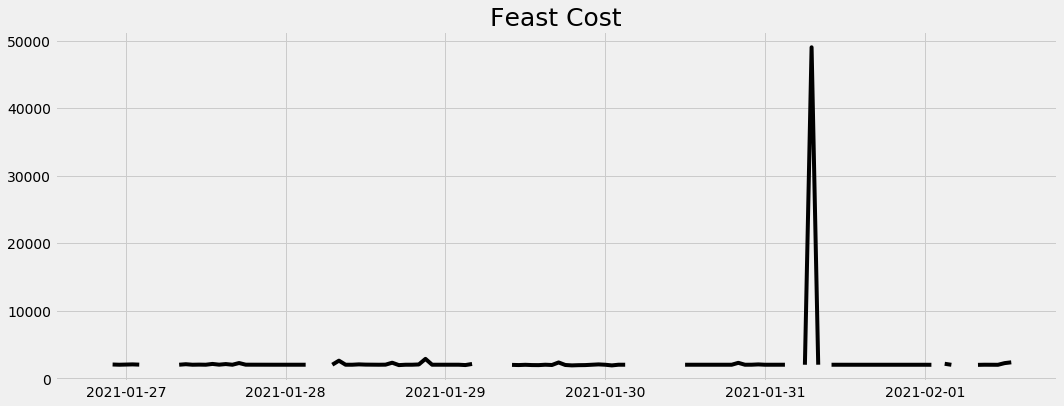

In [34]:
plt.figure(figsize=(16,6))
plt.title('Feast Cost', size=25)
plt.ticklabel_format(style = 'plain')
plt.plot(uniqueTime, feastCost, color='black')
plt.show()

In [25]:
print('Lowest ribs price was ' + str(ribsMinMax[0][0]) + ' and occurred on ' + str(uniqueTime[ribsCost.index(ribsMinMax[0][0])]))

Lowest ribs price was 78.8353 and occurred on 2021-01-28 06:00:05


In [26]:
print('Highest ribs price was ' + str(ribsMinMax[0][1]) + ' and occurred on ' + str(uniqueTime[ribsCost.index(ribsMinMax[0][1])]))

Highest ribs price was 8864.1071 and occurred on 2021-01-28 05:00:04


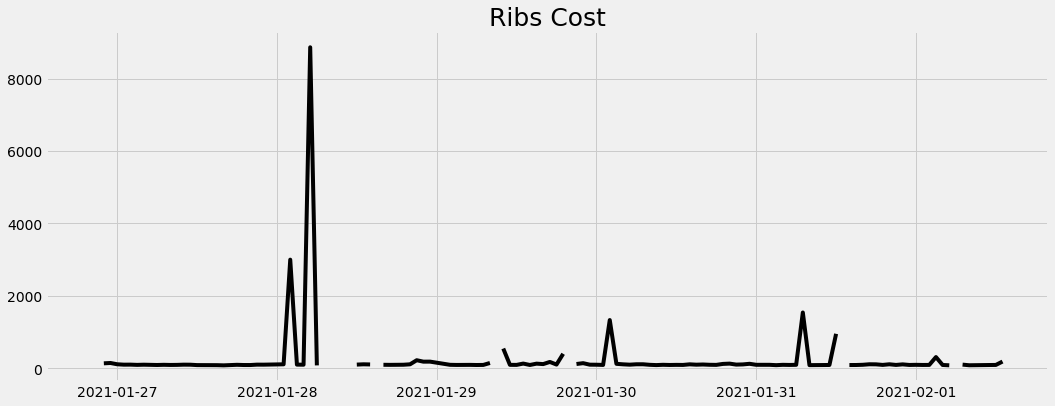

In [31]:
plt.figure(figsize=(16,6))
plt.title('Ribs Cost', size=25)
plt.ticklabel_format(style = 'plain')
plt.plot(uniqueTime, ribsCost, color='black')
plt.show()

In [28]:
print('Lowest thade price was ' + str(thadeMinMax[0][0]) + ' and occurred on ' + str(uniqueTime[thadeCost.index(thadeMinMax[0][0])]))

Lowest thade price was 13.8515 and occurred on 2021-01-27 00:00:03


In [29]:
print('Highest thade price was ' + str(thadeMinMax[0][1]) + ' and occurred on ' + str(uniqueTime[thadeCost.index(thadeMinMax[0][1])]))

Highest thade price was 163691.96 and occurred on 2021-01-31 12:00:05


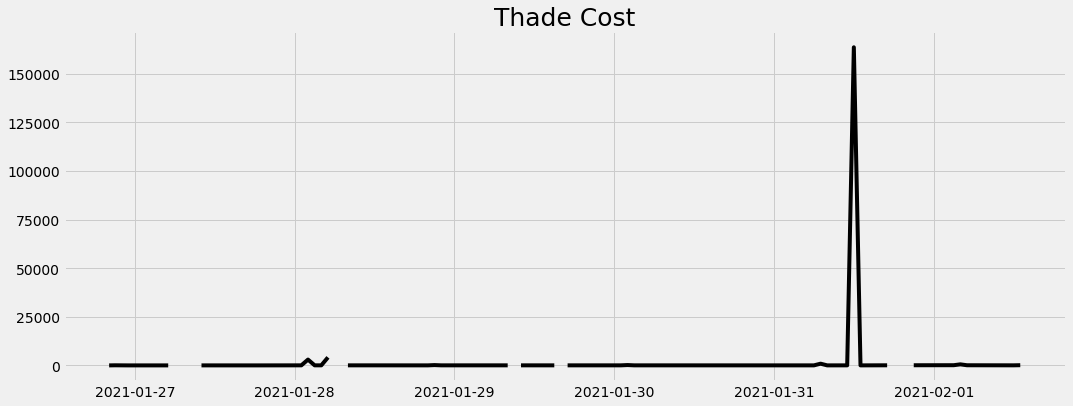

In [32]:
plt.figure(figsize=(16,6))
plt.title('Thade Cost', size=25)
plt.ticklabel_format(style = 'plain')
plt.plot(uniqueTime, thadeCost, color='black')
plt.show()

From the above charts, there were clearly some outliers. Some items were probably posted at absurd prices but eventually timed out in the auction house.